In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("../data/heart.csv")

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Dataset info
print("\n✅ Dataset Info:\n")
df.info()

# Check for missing values
print("\n✅ Missing Values:\n", df.isnull().sum())



✅ Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

✅ Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal      


Target Class Distribution:
 target
1    526
0    499
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_524\1277920609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='Set2', hue=None, legend=False)


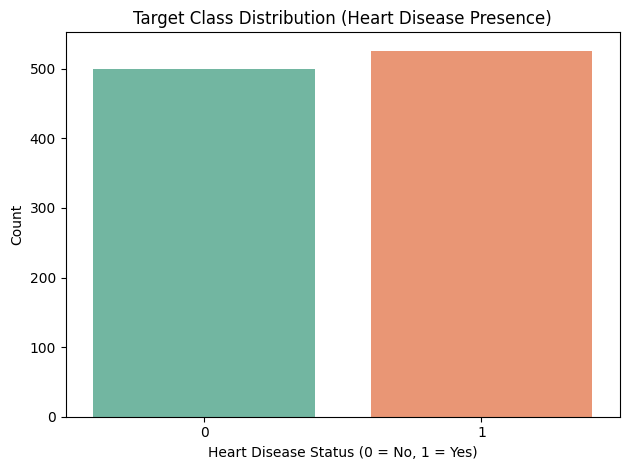

In [12]:
# Check target class distribution
target_col = 'target'

print("\nTarget Class Distribution:\n", df[target_col].value_counts())

# Visualize class balance (Warning-free)
sns.countplot(data=df, x=target_col, palette='Set2', hue=None, legend=False)

plt.title('Target Class Distribution (Heart Disease Presence)')
plt.xlabel('Heart Disease Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../visuals/target_class_distribution.png')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Training Set Shape: {X_train.shape}")
print(f"✅ Testing Set Shape: {X_test.shape}")

# Feature Scaling (for Random Forest it's not necessary, but doing for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



✅ Training Set Shape: (820, 13)
✅ Testing Set Shape: (205, 13)



 Decision Tree Accuracy: 0.8390


C:\Users\Admin\AppData\Local\Temp\ipykernel_524\3271170290.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_524\3271170290.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("../visuals/decision_tree_plot.png")
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


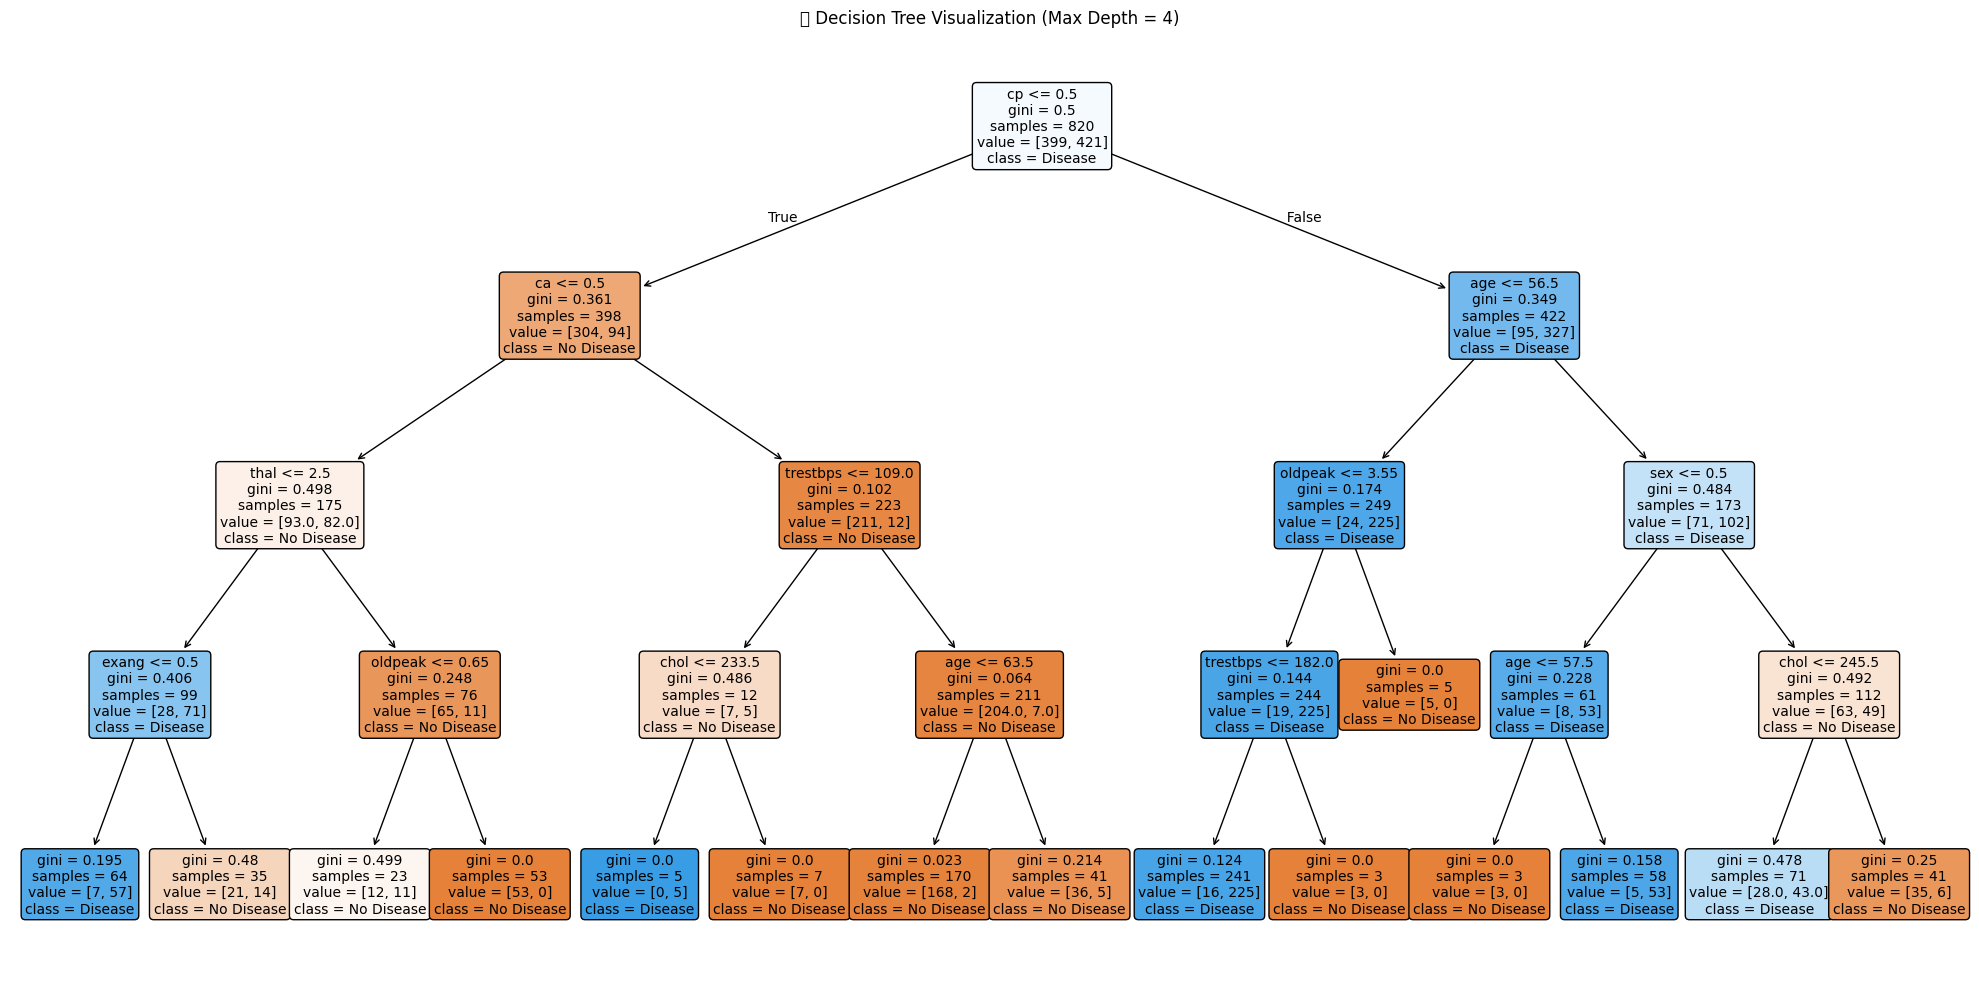

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"\n Decision Tree Accuracy: {dt_accuracy:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('✅ Decision Tree Visualization (Max Depth = 4)')
plt.tight_layout()
plt.savefig("../visuals/decision_tree_plot.png")
plt.show()



✅ Random Forest Accuracy: 0.9610


C:\Users\Admin\AppData\Local\Temp\ipykernel_524\3816898642.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


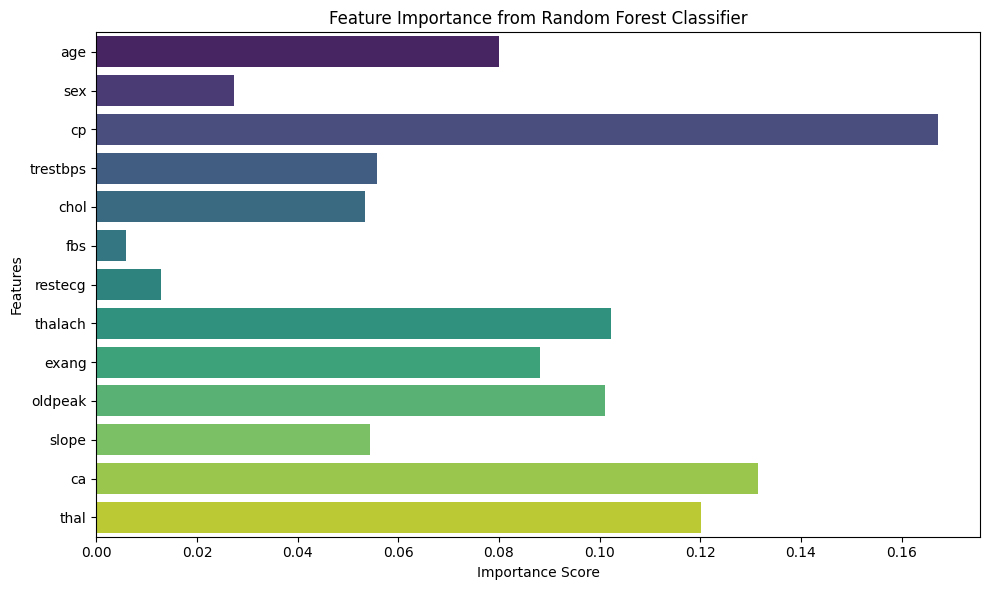

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"\n✅ Random Forest Accuracy: {rf_accuracy:.4f}")

# Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("../visuals/random_forest_feature_importance.png")
plt.show()


✅ Decision Tree CV Accuracy (mean): 0.8429
✅ Random Forest CV Accuracy (mean): 0.9599

✅ Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



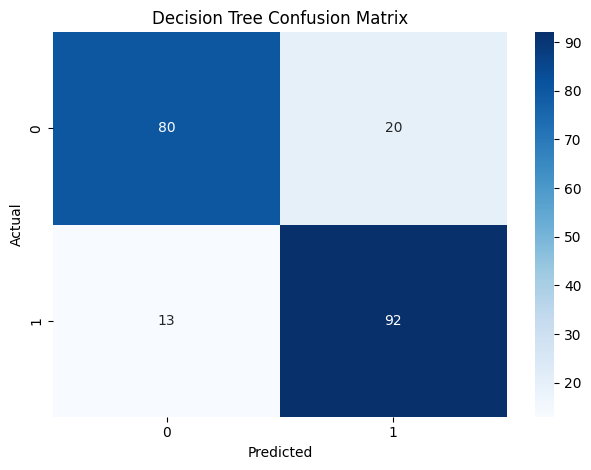


✅ Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.95      0.97      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



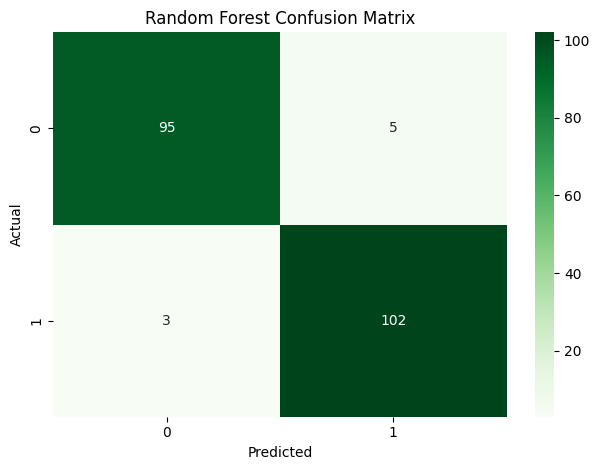

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Cross-validation scores (10-fold)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=10)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10)

print(f"✅ Decision Tree CV Accuracy (mean): {dt_cv_scores.mean():.4f}")
print(f"✅ Random Forest CV Accuracy (mean): {rf_cv_scores.mean():.4f}")

# Classification report for Decision Tree
print("\n✅ Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("../visuals/decision_tree_confusion_matrix.png")
plt.show()

# Classification report for Random Forest
print("\n✅ Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("../visuals/random_forest_confusion_matrix.png")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_524\1408336870.py:25: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_524\1408336870.py:26: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("../visuals/roc_auc_comparison.png")
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


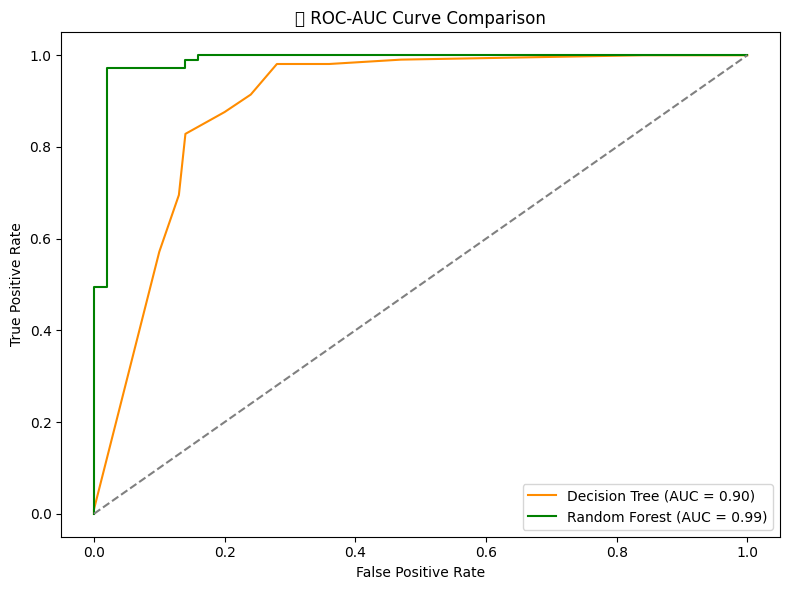

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for both models
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})', color='darkorange')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('✅ ROC-AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("../visuals/roc_auc_comparison.png")
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("\n✅ Cross-Validation Accuracy Scores for Random Forest:\n", cv_scores)
print(f"✅ Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")



✅ Cross-Validation Accuracy Scores for Random Forest:
 [0.9902439  0.95121951 0.97560976 0.94634146 0.93170732]
✅ Mean CV Accuracy: 0.9590 (+/- 0.0211)


In [22]:
print("✅ Summary:")
print(f"- Decision Tree Test Accuracy: {dt_accuracy:.4f}")
print(f"- Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"- Random Forest Mean CV Accuracy: {cv_scores.mean():.4f}")
print("\n🎯 Random Forest performed better with higher accuracy and generalization based on cross-validation and ROC-AUC scores.")


✅ Summary:
- Decision Tree Test Accuracy: 0.8390
- Random Forest Test Accuracy: 0.9610
- Random Forest Mean CV Accuracy: 0.9590

🎯 Random Forest performed better with higher accuracy and generalization based on cross-validation and ROC-AUC scores.
